In [1]:
from vortexasdk import Products, CargoTimeSeries, Geographies
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Products tutorial

First Im going to show you how to get the Vortexa ID for a product you are intestested in studying. There are many ways of doing this, and today Im going to show you one options I have used.

From the examples in the docs found here: https://vortechsa.github.io/python-sdk/endpoints/products/. We can see an example line of code which shows us how to look in for different products in a list

In [2]:
df = Products().search(term=['diesel', 'fuel oil', 'grane']).to_df()

2020-06-28 08:42:27,150 vortexasdk.operations — INFO — Searching Products
2020-06-28 08:42:27,151 vortexasdk.client — INFO — Creating new VortexaClient
2020-06-28 08:42:27,370 vortexasdk.client — INFO — Payload: {'term': ['diesel', 'fuel oil', 'grane'], 'allowTopLevelProducts': True}
2020-06-28 08:42:27,656 vortexasdk.client — INFO — 71 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [3]:
df.head()

,id,name,layer.0,parent.0.name
0,1c107b4317bc2c85fb6c13cd7b28e8e0a02ec7fecc68af...,Fuel Oil,group_product,Dirty Petroleum Products
1,e6e879021c45470d84ee2f182a42a13537b489ae730640...,Other Fuel Oils,grade,High Sulphur Fuel Oil
2,da9e67b1dd201a1ad3ae251e6dce8fad404ce50d53adba...,RMD Fuel Oil,grade,High Sulphur Fuel Oil
3,0dd7857f328177189e20a54af1dc599c8b7e04e79e61cd...,Fuel Oil Cut,grade,High Sulphur Fuel Oil
4,bd8990f0ee38a4282bb212fdd52690309b7f416a496e13...,Bunker Fuel Oil,grade,High Sulphur Fuel Oil


For my study I want to focus on crude so I am going to modify the list which contains oil product names like this: 

In [4]:
crude_search_df = Products().search(term=['crude']).to_df()

2020-06-28 08:42:27,975 vortexasdk.operations — INFO — Searching Products
2020-06-28 08:42:27,976 vortexasdk.client — INFO — Payload: {'term': ['crude'], 'allowTopLevelProducts': True}
2020-06-28 08:42:28,177 vortexasdk.client — INFO — 18 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [5]:
crude_search_df.head()

,id,name,layer.0,parent.0.name
0,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,Crude,group_product,Crude/Condensates
1,e1b3d075a9340969322024a35b8c720e5065d8c95a91b6...,Crude Vegoil,grade,Biodiesel Feedstock
2,4fe046d7478c4072b9ecbaa2c03d3b977bbfec5077ee44...,Crude Butadiene,grade,Olefins/Other Chemicals
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,Crude/Condensates,group,NaN
4,9fda040ee8844e47b5239051e322d06dd9d2b96f0c3249...,TPAO crude,grade,Medium-Sour


Here we can see that there are 18 rows and we only want the first one. So what we can do here is take a mask of the DataFrame where the name column equals crude like this: 

This mask can be applied to the dataframe to get only records which the condition above is true like this:

In [6]:
crude_condenstates_only_mask = crude_search_df['name'] == 'Crude/Condensates'

In [7]:
crude_condenstates_only_df = crude_search_df.loc[crude_condenstates_only_mask]

In [8]:
crude_condenstates_only_df

,id,name,layer.0,parent.0.name
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,Crude/Condensates,group,NaN


Here im going to show you a little tip to look at the value for one row in a data frame.  if we do the following : `df.iloc[x,y]` you get the value which is in that location in the DataFrame. To get just the product ID which we will be using later we can use `crude_condenstates_only_df.iloc[0,0]` because the value is situated in the first column and the first row. 

In [9]:
crude_condenstates_only_df.iloc[0,0]

'54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'

So now we've got the product ID we want to look at lets find the area we want to conduct our research in.

# Geographies 

Just like before we are going to use one of the examples from the documentation and slightly tweak it to what we need for our study. Docs found here: https://vortechsa.github.io/python-sdk/endpoints/geographies/.

In [10]:
df = Geographies().search(term=["Liverpool", "Southampton"]).to_df()

2020-06-28 08:42:29,340 vortexasdk.operations — INFO — Searching Geographies
2020-06-28 08:42:29,341 vortexasdk.client — INFO — Payload: {'term': ['Liverpool', 'Southampton']}
2020-06-28 08:42:29,552 vortexasdk.client — INFO — 4 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [11]:
df

,id,name,layer
0,b600e4f54cbdef578b2c6bdd7f508212ee4fb9552991d8...,Liverpool [GB],[port]
1,0c69b0aaf2d110e102dd3b3f05d5540b8e5346d27f344a...,Southampton [GB],[port]
2,8baf08eff90bf9a1677ca0e55aae7e139bfaf155563b1e...,Liverpool Docks,[terminal]
3,98db74d66fac18f2b0d8488f46af96fec3fc6edb7bc267...,Liverpool Bulk Liquids,[terminal]


In [12]:
china_search_df = Geographies().search(term=["China"]).to_df()

2020-06-28 08:42:29,909 vortexasdk.operations — INFO — Searching Geographies
2020-06-28 08:42:29,910 vortexasdk.client — INFO — Payload: {'term': ['China']}
2020-06-28 08:42:30,185 vortexasdk.client — INFO — 13 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [13]:
china_search_df.head(5)

,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5...,China,[country]
1,781cacc7033f877caa4b4106d096b74afe006a96391bf5...,South China,[shipping_region]
2,a63890260e29d859390fd1a23c690181afd4bd152943a0...,North China,[shipping_region]
3,b5fafce6e20de2dc307fb7e0b89978ee91a49a7b6ec6f5...,China (excl. HK & Macau),[shipping_region]
4,9a021f43c397b175ddfff7a91d46ee6e6e16d37e9f9d52...,China Steel Chemical,[terminal]


Just as before lets make a mask and apply it to the inital DataFrame and get just the Geography we are interested in. 

This time rather than defining the mask as its own variable we can just write the mask code inside the square brackets. Either way of applying a mask gets the same result it just comes down the personal preference. 

In [14]:
china_only_df = china_search_df.loc[china_search_df['name']=='China']

In [15]:
china_only_df

,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5...,China,[country]


Just as before we could use `df.iloc[x,y]` to get the geography id from this Dataframe, however there is another option which is to increase the column width settings using this line of code `pd.set_option('max_colwidth', 75)`. Either works and its just down to personal preference. 

In [16]:
pd.set_option('max_colwidth', 75)
china_only_df

,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2,China,[country]


In [17]:
china_only_df.iloc[0,0]

'934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'

# My floating storage study

For my study I want to look at Crude and condensates in currently in floating storage sitated in China and how this has changed over in 2020. So once again Im going to take the code which is provided in the documentation and change it to my specific needs.

In [18]:
rotterdam = [g.id for g in Geographies().search("rotterdam").to_list() if "port" in g.layer]
crude = [p.id for p in Products().search("crude").to_list() if "Crude" == p.name]
search_result = CargoTimeSeries().search(
    timeseries_unit='bpd',
    timeseries_frequency='month',
    filter_origins=rotterdam,
    filter_products=crude,
    filter_activity='loading_state',
    filter_time_min=datetime(2018, 1, 1),
    filter_time_max=datetime(2018, 12, 31))
df = search_result.to_df()

2020-06-28 08:42:33,408 vortexasdk.operations — INFO — Searching Geographies
2020-06-28 08:42:33,409 vortexasdk.client — INFO — Payload: {'term': ['rotterdam']}
2020-06-28 08:42:33,637 vortexasdk.client — INFO — 11 Results to retrieve. Sending 1 post requests in parallel using 6 threads.
2020-06-28 08:42:35,109 vortexasdk.operations — INFO — Searching Products
2020-06-28 08:42:35,111 vortexasdk.client — INFO — Payload: {'term': ['crude'], 'allowTopLevelProducts': True}
2020-06-28 08:42:35,300 vortexasdk.client — INFO — 18 Results to retrieve. Sending 1 post requests in parallel using 6 threads.
2020-06-28 08:42:36,745 vortexasdk.operations — INFO — Searching CargoTimeSeries
2020-06-28 08:42:36,746 vortexasdk.client — INFO — Payload: {'filter_activity': 'loading_state', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2018-12-31T00:00:00.000Z', 'filter_products': ['6f11b0724c9a4e85ffa7f1445bc768f054af755a090118dcf99f14745c261653'], 'filter_origins': ['68faf65af1345067f

Lets break the query above down line by line.

1) The first line finds the ID for Rotterdam using the geographies endpoint.

2) Then the ID for crude using the products endpoint. 

3) Then it calls the CargoTimeSeries endpoint

4) The unit is set to barrels

5) The timeseries frequency is set to a month

6) The origin is set to Rotteredams ID which was found in line 1

7) The product is crude which was found in line 2

8) The filter activity is set to loading state

9) The start time for the query is set to the beggining of 2018

10) The end time for the query is set to the end of 2018

11) The search result is turned into a DataFrame

So how can we change that query to get Crude/condestates in floating storage sitatued in China? As we already have the IDs for our geography and product we dont need to call those endpoints in our first 2 lines, instead we can just assign them to variables called `crude_condesates_id` and `china_id`. 

The we can use the same 3rd line as before as we are calling the same endpoint. For our 4th line I prefer to think of things in termes of tonnes so Im going to change the `timeseries_unit` to be `t`. As id also prefer to look at the time in terms of days rather that months so im going to change the 5th line to say `day` rather than `month`. 

For the 6th line we are going to change this one slightly, as Im not concered where the crude/ condensates has come from im going to remove the `filter_origins` arguement and replace it which `filter_storage_locations`, and set it to `china_id` which we have defined in the first line.

For the 7th line Im going to set the `filter_products` arguement to `crude_condesates_id` which we have defined in the 2nd line.

This time for the 8th line Im going to set the `filter_activity` to `'storing_state'`.

For the 9th and 10th lines im going to update the dates to the start of this year and todays date.

Finally im going to keep the 11th line the same. Lets see what happens

In [19]:
china_id = '934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'
crude_condesates_id = '54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'
search_result = CargoTimeSeries().search(
    timeseries_unit='t',
    timeseries_frequency='day',
    filter_storage_locations=china_id,
    filter_products=crude_condesates_id,
    filter_activity='storing_state',
    filter_time_min=datetime(2020, 1, 1),
    filter_time_max=datetime(2020, 6, 27))
df_fs = search_result.to_df()

2020-06-28 08:42:39,159 vortexasdk.operations — INFO — Searching CargoTimeSeries
2020-06-28 08:42:39,160 vortexasdk.client — INFO — Payload: {'filter_activity': 'storing_state', 'filter_time_min': '2020-01-01T00:00:00.000Z', 'filter_time_max': '2020-06-27T00:00:00.000Z', 'filter_products': ['54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'], 'filter_storage_locations': ['934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'], 'timeseries_frequency': 'day', 'timeseries_unit': 't', 'timeseries_activity': 'storing_state', 'size': 500}


# Ignore down here for understanding this is just to check if the graph is right

In [20]:


# rename columns
df_fs = df_fs.rename(columns={'key': 'date',
                              'value': 't',
                              'count': 'number_of_cargo_movements'})

# remove time zone from timestamp
df_fs['date'] = pd.to_datetime(df_fs['date']).dt.tz_localize(None)

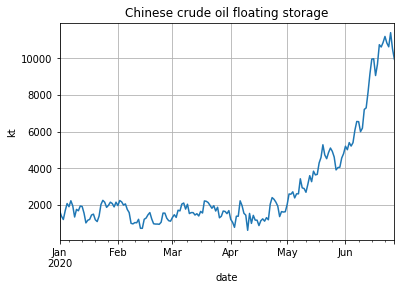

In [21]:
floating_storage = df_fs.set_index('date')['t'] / 1000
floating_storage.plot(title='Chinese crude oil floating storage', grid=True)
plt.xlabel('date')
plt.ylabel('kt');